In [1]:
import pandas as pd

# Load with appropriate encoding
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [2]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df = df.dropna(subset=['Description'])

In [4]:
df = df.drop_duplicates()

In [5]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [6]:
df = df[df['Country'] == 'United Kingdom']

In [7]:
df['Description'] = df['Description'].str.strip().str.lower()

In [8]:
df = df.reset_index(drop=True)

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
df.to_csv('cleaned_data.csv', index=False)

In [11]:
# STEP 2: Drop rows with missing product descriptions
df.dropna(subset=['Description'], inplace=True)

In [12]:

# STEP 3: Remove duplicate rows
df.drop_duplicates(inplace=True)


In [13]:
# STEP 4: Filter out refunds and errors (Quantity > 0 and UnitPrice > 0)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [14]:
# STEP 5: Optional - Focus on a specific market (e.g., United Kingdom)
df = df[df['Country'] == 'United Kingdom']

In [15]:
# STEP 6: Standardize product names (remove spaces and make lowercase)
df['Description'] = df['Description'].str.strip().str.lower()

In [16]:
# STEP 7: Convert InvoiceNo to string (if not already)
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

In [17]:
# STEP 8: Remove credit/refund transactions (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].str.startswith('C')]

In [18]:
# STEP 9: Reset index
df.reset_index(drop=True, inplace=True)

In [19]:
# STEP 10: Preview the cleaned dataset
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [20]:
# Group by InvoiceNo and Description and sum the Quantity
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Convert quantity values to binary (1 = purchased, 0 = not purchased)
basket = basket.applymap(lambda x: x > 0)

# Preview the basket format
print(basket.head())


/tmp/ipython-input-2293095642.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: x > 0)


Description  *boombox ipod classic  *usb office mirror ball  \
InvoiceNo                                                     
536365                       False                    False   
536366                       False                    False   
536367                       False                    False   
536368                       False                    False   
536369                       False                    False   

Description  10 colour spaceboy pen  12 coloured party balloons  \
InvoiceNo                                                         
536365                        False                       False   
536366                        False                       False   
536367                        False                       False   
536368                        False                       False   
536369                        False                       False   

Description  12 daisy pegs in wood box  12 egg house painted wood  \
InvoiceNo          

In [21]:
# Remove products purchased in fewer than 5 transactions
basket = basket.loc[:, basket.sum() > 5]

In [22]:
from mlxtend.frequent_patterns import apriori, association_rules

In [23]:
# Step 1: Convert values to binary (0/1)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

/tmp/ipython-input-2985283022.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [24]:
# Step 2: Ensure values are boolean
basket = basket.astype(bool)

In [25]:
# Step 3: Remove empty rows (no purchases)
basket = basket[basket.any(axis=1)]

In [27]:
item_support = basket.mean()
basket_filtered = basket.loc[:, item_support[item_support >= 0.01].index]

# Check shape after filtering
print("Shape after filtering:", basket_filtered.shape)

Shape after filtering: (17991, 817)


In [23]:
# Step 1: Binary encode the basket (1 if item exists, else 0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0).astype(bool)

# Step 2: Drop rows with no items
basket = basket[basket.any(axis=1)]

# Step 3: Drop infrequent items (appear in < 5% of transactions)
item_support = basket.mean()
basket_filtered = basket.loc[:, item_support[item_support >= 0.05].index]

# Step 4: Optional — limit to first 2000 rows to reduce RAM load
basket_filtered = basket_filtered.head(2000)

# Step 5: Run Apriori (min support can be adjusted)
frequent_itemsets = apriori(basket_filtered, min_support=0.05, use_colnames=True)

# Step 6: Sort and display
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
print(frequent_itemsets.head())


/tmp/ipython-input-3328812363.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0).astype(bool)


    support                              itemsets
17   0.1630  (white hanging heart t-light holder)
14   0.1075            (regency cakestand 3 tier)
3    0.1065               (heart of wicker small)
6    0.0905             (jumbo bag red retrospot)
12   0.0855      (paper chain kit 50's christmas)


In [24]:
# Generate rules using lift as the metric
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules with good confidence and lift
strong_rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1.2)]

# Preview strong rules
print(strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


               antecedents              consequents  support  confidence  \
1  (heart of wicker large)  (heart of wicker small)   0.0525    0.621302   

       lift  
1  5.833819  


In [25]:
strong_rules = strong_rules.sort_values(by='lift', ascending=False)

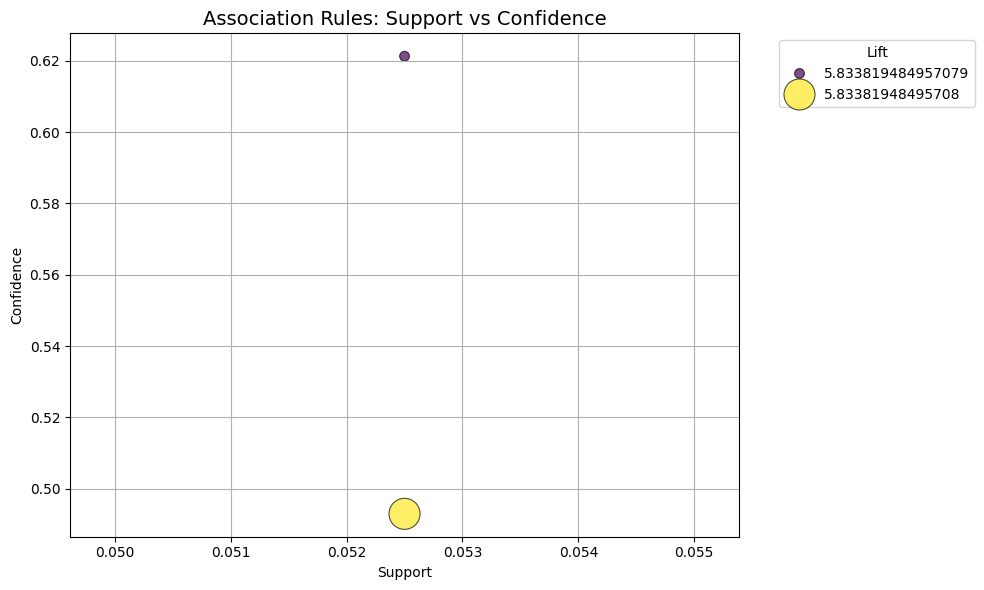

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Filter out rules with extremely high lift to avoid plot distortion
rules_filtered = rules[rules['lift'] < 20]

# Plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=rules_filtered,
    x='support',
    y='confidence',
    size='lift',
    hue='lift',
    sizes=(50, 500),
    palette='viridis',
    alpha=0.7,
    edgecolor='k'
)

plt.title('Association Rules: Support vs Confidence', fontsize=14)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


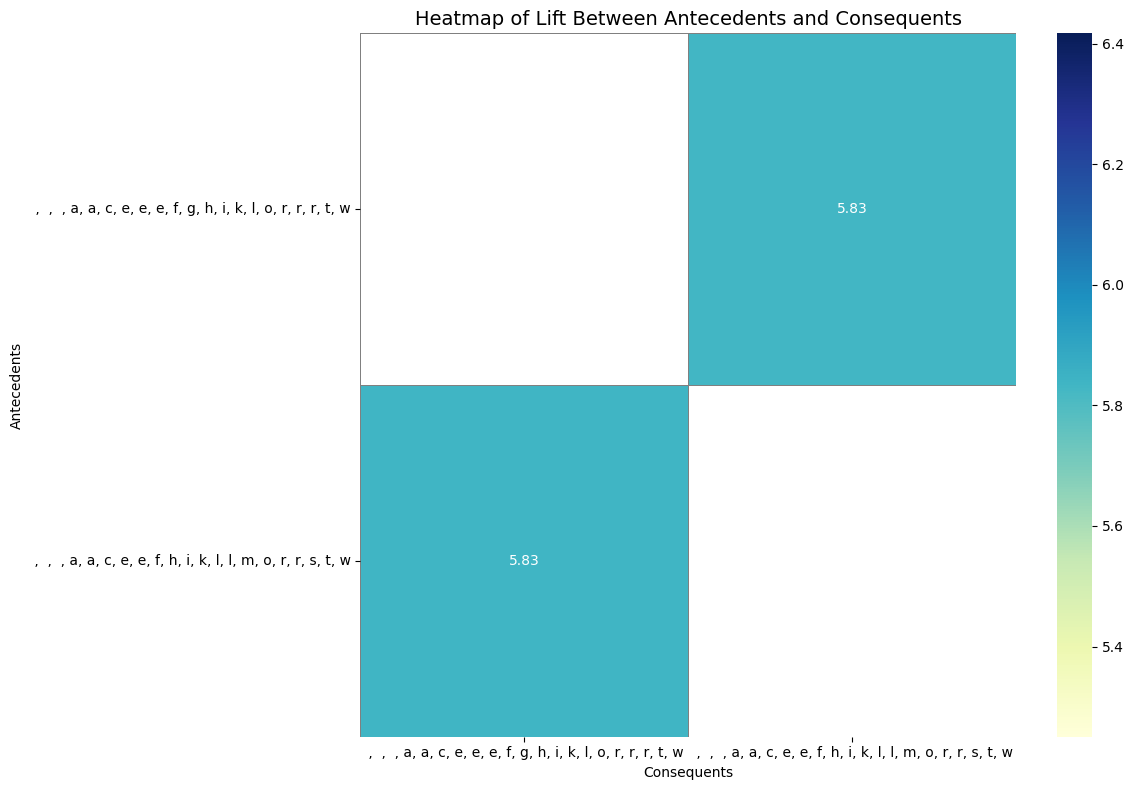

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure antecedents and consequents are in string format
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(sorted(list(x)))).astype(str)
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(sorted(list(x)))).astype(str)

# Create the pivot table
pivot = rules.pivot_table(index='antecedents', columns='consequents', values='lift')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title('Heatmap of Lift Between Antecedents and Consequents', fontsize=14)
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1334864108.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


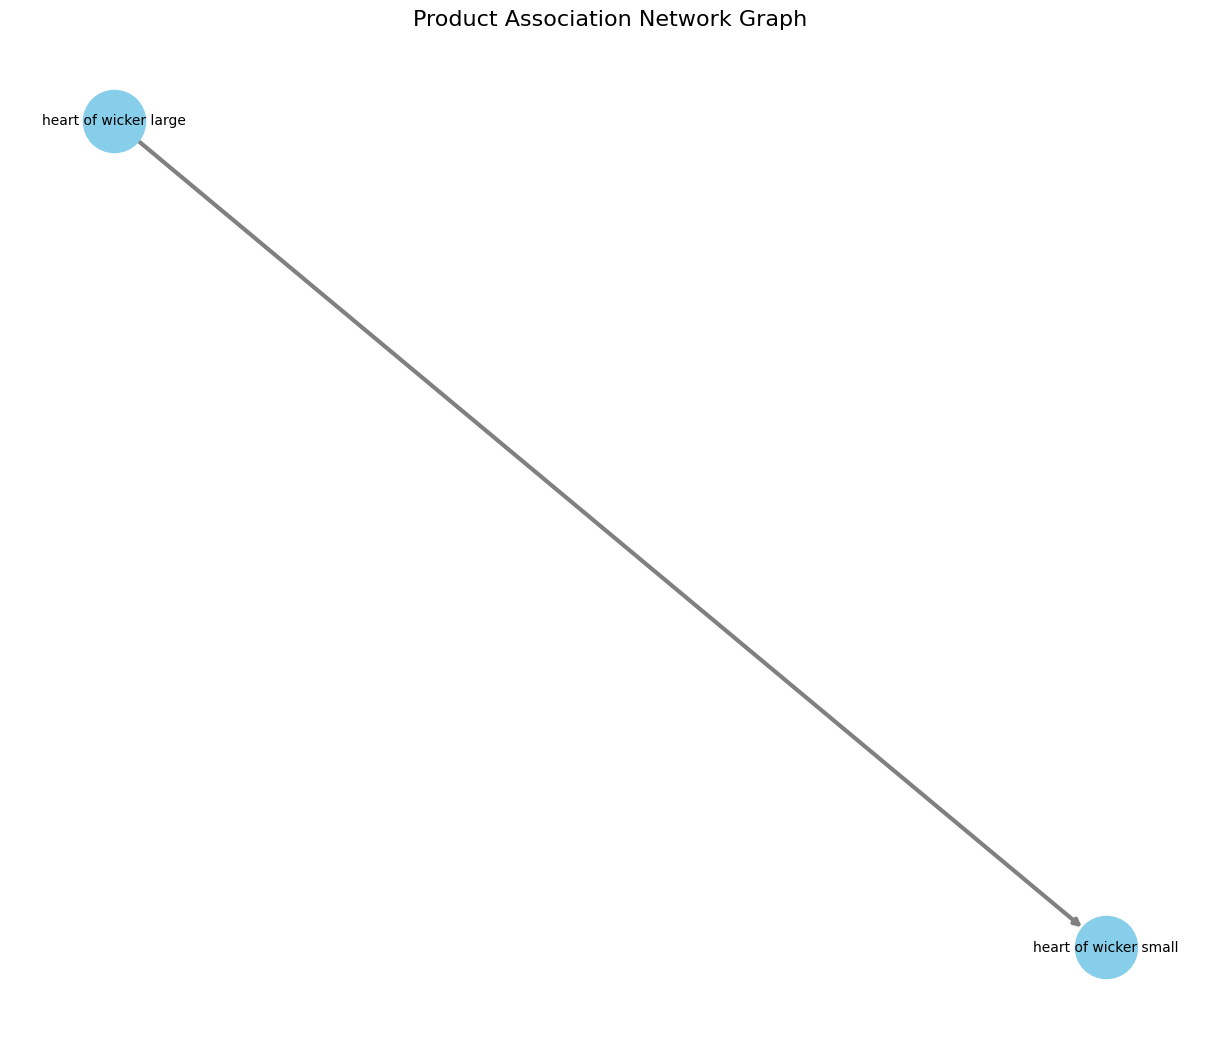

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Ensure antecedents and consequents are converted to sets if needed
strong_rules['antecedents'] = strong_rules['antecedents'].apply(lambda x: set(x) if not isinstance(x, set) else x)
strong_rules['consequents'] = strong_rules['consequents'].apply(lambda x: set(x) if not isinstance(x, set) else x)

# Create a directed graph
G = nx.DiGraph()

# Add edges with lift as weight
for _, row in strong_rules.iterrows():
    for a in row['antecedents']:
        for c in row['consequents']:
            G.add_edge(a, c, weight=row['lift'])

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=1.2, seed=42)  # stable layout
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

# Normalize weights for visibility
max_weight = max(weights) if weights else 1
weights_normalized = [w / max_weight * 3 for w in weights]  # scale for visibility

nx.draw(
    G, pos, with_labels=True,
    node_size=2000, node_color='skyblue',
    arrows=True, width=weights_normalized,
    edge_color='gray', font_size=10
)

plt.title('Product Association Network Graph', fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipython-input-72485743.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='rule', data=top_support, palette='Blues_d')
/tmp/ipython-input-72485743.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


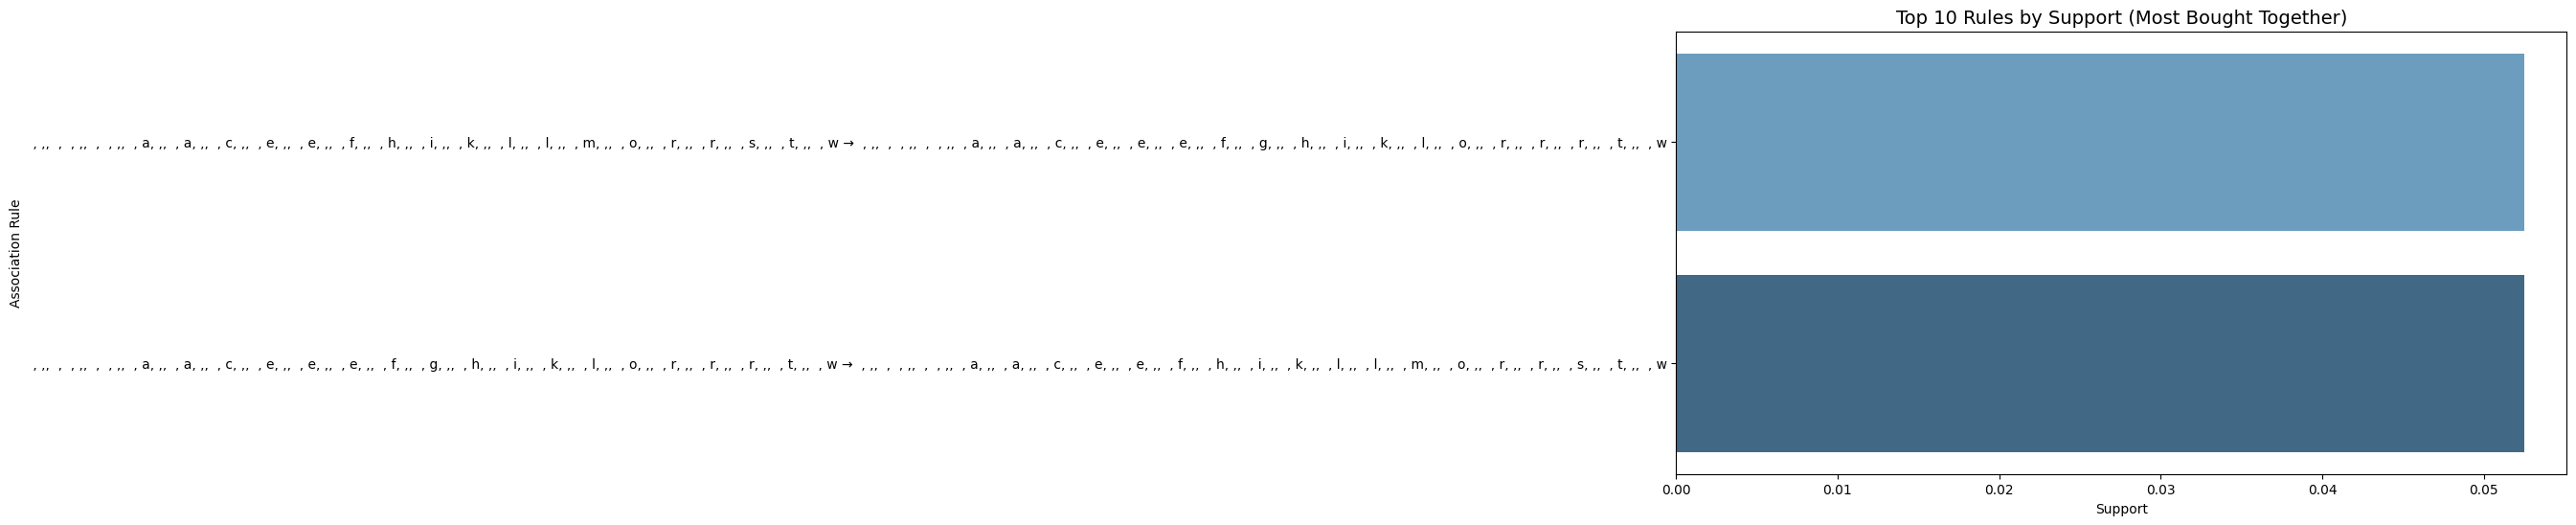

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 association rules by support
top_support = rules.sort_values(by='support', ascending=False).head(10)

# Convert sets to strings
top_support['antecedents_str'] = top_support['antecedents'].apply(lambda x: ', '.join(list(x)))
top_support['consequents_str'] = top_support['consequents'].apply(lambda x: ', '.join(list(x)))
top_support['rule'] = top_support['antecedents_str'] + ' → ' + top_support['consequents_str']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='support', y='rule', data=top_support, palette='Blues_d')
plt.title('Top 10 Rules by Support (Most Bought Together)', fontsize=14)
plt.xlabel('Support')
plt.ylabel('Association Rule')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1269933880.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='confidence', y='rule', data=top_confidence, palette='Greens_d')
/tmp/ipython-input-1269933880.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


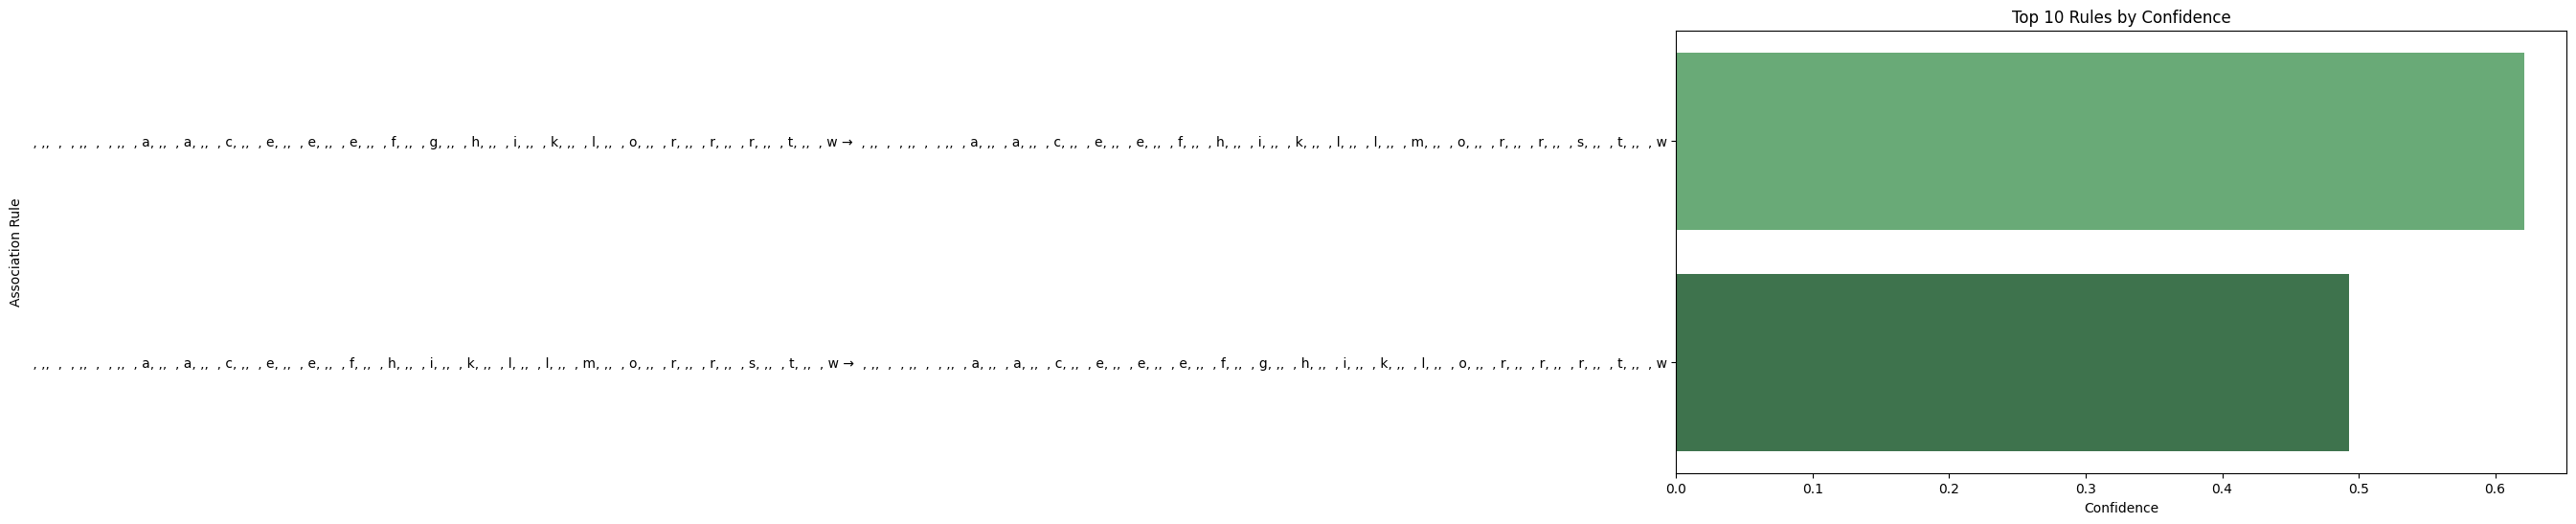

In [37]:
# Top 10 association rules by confidence
top_confidence = rules.sort_values(by='confidence', ascending=False).head(10)

# Convert sets to strings
top_confidence['antecedents_str'] = top_confidence['antecedents'].apply(lambda x: ', '.join(list(x)))
top_confidence['consequents_str'] = top_confidence['consequents'].apply(lambda x: ', '.join(list(x)))
top_confidence['rule'] = top_confidence['antecedents_str'] + ' → ' + top_confidence['consequents_str']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='confidence', y='rule', data=top_confidence, palette='Greens_d')
plt.title('Top 10 Rules by Confidence')
plt.xlabel('Confidence')
plt.ylabel('Association Rule')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1150399874.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y='rule', data=top_lift, palette='Purples_d')
/tmp/ipython-input-1150399874.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


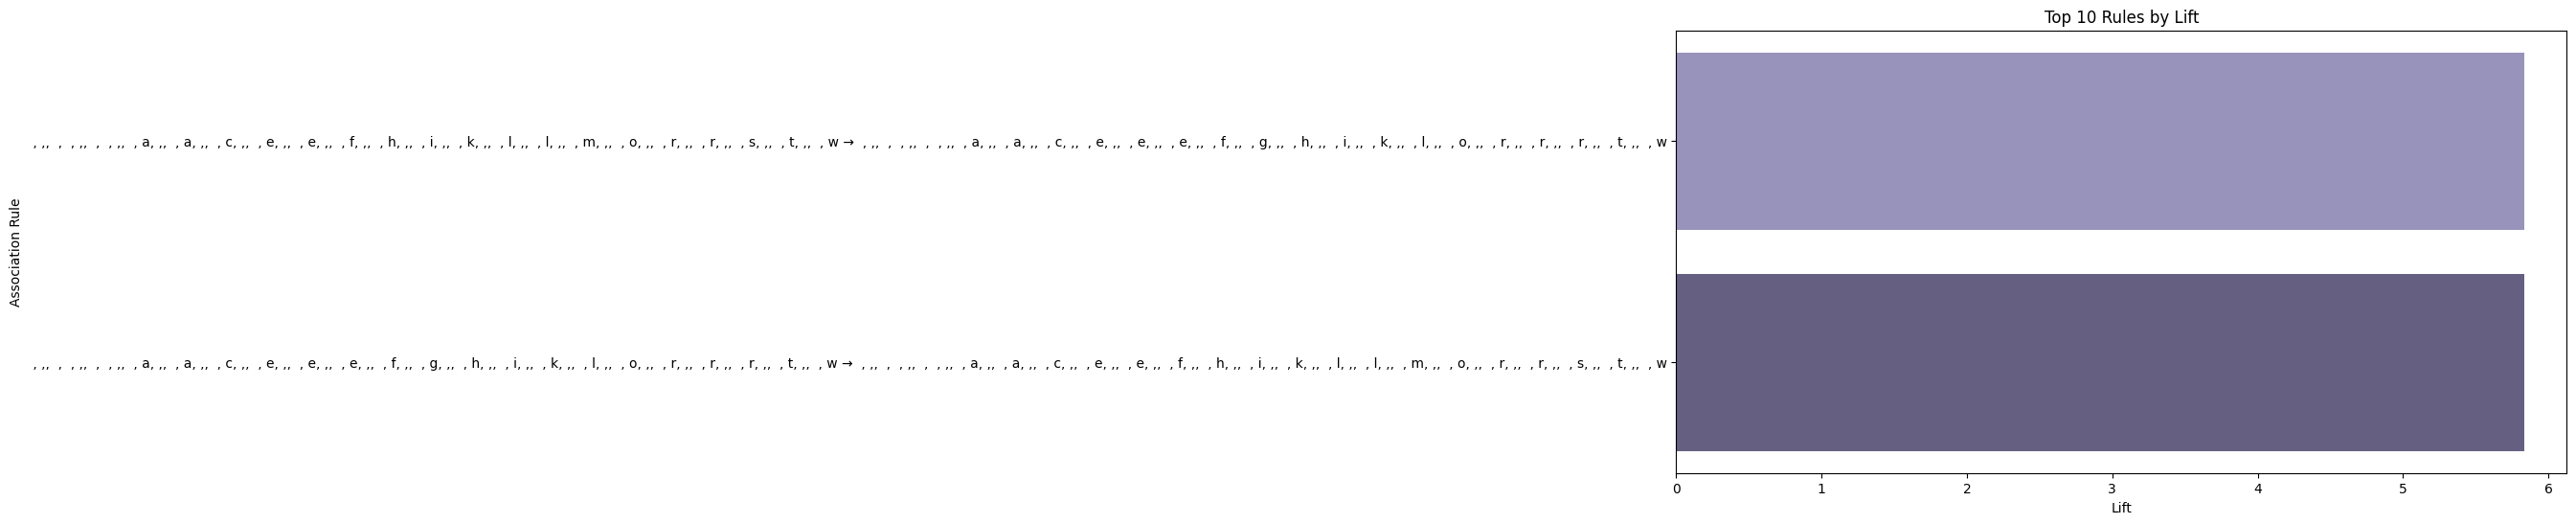

In [38]:
# Top 10 association rules by lift
top_lift = rules.sort_values(by='lift', ascending=False).head(10)

# Convert sets to strings
top_lift['antecedents_str'] = top_lift['antecedents'].apply(lambda x: ', '.join(list(x)))
top_lift['consequents_str'] = top_lift['consequents'].apply(lambda x: ', '.join(list(x)))
top_lift['rule'] = top_lift['antecedents_str'] + ' → ' + top_lift['consequents_str']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='lift', y='rule', data=top_lift, palette='Purples_d')
plt.title('Top 10 Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Association Rule')
plt.tight_layout()
plt.show()


/tmp/ipython-input-682115283.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(handles=handles[:6], labels=labels[:6], title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')


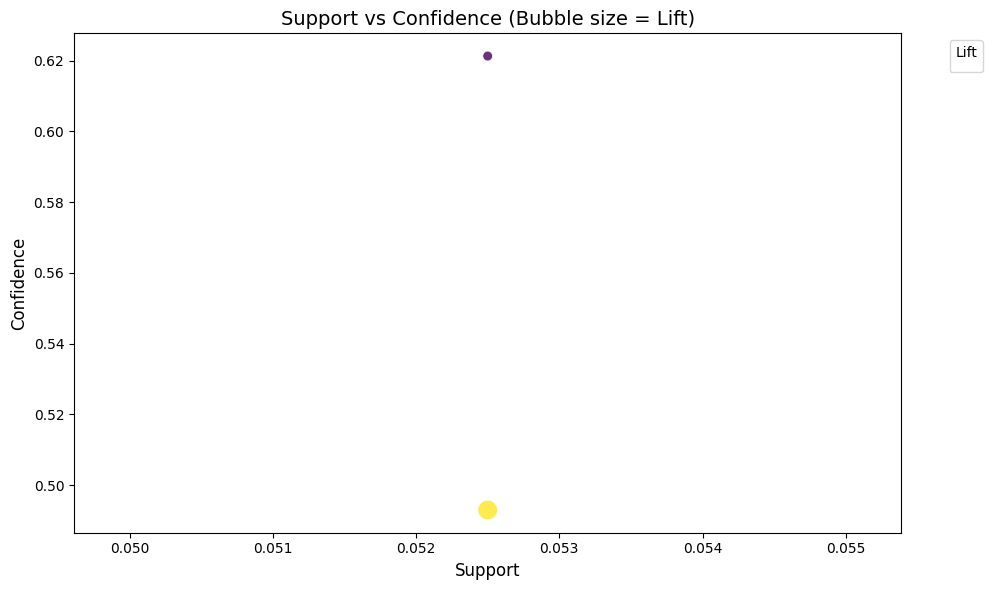

In [40]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=rules,
    x='support',
    y='confidence',
    size='lift',
    hue='lift',
    palette='viridis',
    alpha=0.8,
    sizes=(50, 200),
    legend=False  # Optional: Set to True if you want a legend for hue/size
)

plt.title('Support vs Confidence (Bubble size = Lift)', fontsize=14)
plt.xlabel('Support', fontsize=12)
plt.ylabel('Confidence', fontsize=12)

# Optional: show size legend
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[:6], labels=labels[:6], title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [41]:
rules.to_csv("final_association_rules.csv", index=False)